<a href="https://colab.research.google.com/github/jiin-son/nba/blob/main/NBA_Machine_Learning1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.3f}'.format

In [2]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.metrics import precision_score, recall_score, roc_auc_score

In [3]:
!pip install xgboost
import xgboost as xgb

In [4]:
!pip install optuna
import optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 3.2 MB/s eta 0:00:00


In [5]:
from google.colab import files
uploaded = files.upload()

Saving prep_df2.csv to prep_df2.csv


In [7]:
df = pd.read_csv('prep_df2.csv')

In [8]:
import random
import hashlib

def md5_hash(input_string):
  """Generates an MD5 hash from a given string.
  Args:
    input_string: The string to hash.
  Returns:
    The MD5 hash as a hexadecimal string.
  """
  md5_hasher = hashlib.md5()
  md5_hasher.update(input_string.encode('utf-8'))
  return md5_hasher.hexdigest()

# Example usage
input_string = "NBA"
hashed_value = md5_hash(input_string)
print(f"The MD5 hash of '{input_string}' is: {hashed_value}")

# Convert the hexadecimal hash to an integer
try:
    number = int(hashed_value, 16)
    print(f"The integer representation of the hash is: {number}")
except ValueError:
    print("Invalid hexadecimal string")

# Set the seed value
random.seed(number)

print(f"Initial seed number: {number}")

# Generate a list of 10 random numbers
random.seed(number)
a = 0
b = 2**31-1
random_numbers = [random.randint(a, b) for _ in range(10)]

# Print the list
print("Seed", random_numbers)

The MD5 hash of 'NBA' is: 52b6d6fc82db6aef110362f4755a1fe8
The integer representation of the hash is: 109946054124266886270703940407869972456
Initial seed number: 109946054124266886270703940407869972456
Seed [1578879816, 1978497697, 1190903919, 1878057853, 1288653849, 873208946, 343223680, 1954458820, 1609495891, 882467736]


In [45]:
df

HOME  OVERTIME  REST_DAYS  PREVIOUS_GAME_WIN_STREAK  FG_PCT  FT_PCT  \
0    0.000     0.000      2.000                     3.000   0.421   1.000   
1    0.000     0.000      2.000                     3.000   0.412   0.833   
2    0.000     0.000      2.000                     3.000   0.500   1.000   
3    0.000     0.000      2.000                     3.000   0.308   0.500   
4    0.000     0.000      2.000                     3.000   0.167   0.000   
...    ...       ...        ...                       ...     ...     ...   
9542 1.000     0.000      0.000                     7.000   0.100   0.000   
9543 1.000     0.000      0.000                     7.000   0.400   0.000   
9544 1.000     0.000      0.000                     7.000   0.167   0.000   
9545 1.000     0.000      0.000                     7.000   0.000   0.000   
9546 1.000     0.000      0.000                     7.000   0.000   0.000   

        REB   AST   STL   BLK    TO    PF  Height_in_Inches  YEARS_IN_LEAGUE  \
0     3.000 3.000 1.000 1.000 3.000 2.000                78            9.000   
1    10.000 1.000 2.000 0.000 2.000 1.000                80            8.000   
2     9.000 1.000 1.000 0.000 4.000 5.000                86           10.000   
3     4.000 4.000 1.000 3.000 3.000 1.000                76            8.000   
4     8.000 6.000 0.000 0.000 2.000 4.000                76           16.000   
...     ...   ...   ...   ...   ...   ...               ...              ...   
9542  4.000 4.000 0.000 0.000 1.000 2.000                73            5.000   
9543  5.000 1.000 0.000 0.000 0.000 2.000                79            4.000   
9544  7.000 2.000 0.000 0.000 0.000 1.000                79            5.000   
9545  0.000 1.000 0.000 0.000 0.000 0.000                78            2.000   
9546  0.000 0.000 0.000 0.000 0.000 1.000                84            4.000   

      FG_PCT_LAST_SEASON  FT_PCT_LAST_SEASON  REB_LAST_SEASON  \
0                  0.499               0.703          387.000   
1                  0.471               0.833          601.000   
2                  0.516               0.858          409.000   
3                  0.461               0.901          310.000   
4                  0.480               0.833          373.000   
...                  ...                 ...              ...   
9542               0.468               0.821          265.000   
9543               0.446               0.895          276.000   
9544               0.434               0.440          211.000   
9545               0.400               0.500           20.000   
9546               0.644               0.714          122.000   

      AST_LAST_SEASON  STL_LAST_SEASON  BLK_LAST_SEASON  TOV_LAST_SEASON  \
0             249.000           83.000           37.000          166.000   
1             364.000           75.000           43.000          188.000   
2             115.000           42.000          111.000           89.000   
3             377.000           74.000           87.000          112.000   
4             333.000           61.000           53.000          124.000   
...               ...              ...              ...              ...   
9542          281.000           39.000            6.000           61.000   
9543           82.000           40.000           25.000           32.000   
9544           77.000           51.000           44.000           34.000   
9545            5.000            5.000            1.000            3.000   
9546           20.000           13.000           21.000           13.000   

      PF_LAST_SEASON  TRADED_LAST_SEASON  PLAYER_AGE  TRADED_THIS_SEASON  \
0            185.000               0.000      28.000                   0   
1            145.000               0.000      26.000                   0   
2            156.000               0.000      29.000                   0   
3            152.000               0.000      30.000                   0   
4            108.000               0.000      

In [10]:
seed1 = random_numbers[0]

In [47]:
sub_df = df.drop([
       'POS_G', 'POS_F', 'POS_C', 'POS_FC', 'POS_GF', 'POS_CF', 'POS_FG',
       'TEAM_GSW', 'TEAM_OKC', 'TEAM_CHI', 'TEAM_MEM',
       'TEAM_ORL', 'TEAM_SAS', 'TEAM_DAL', 'TEAM_TOR', 'TEAM_LAC', 'TEAM_PHI',
       'TEAM_SAC', 'TEAM_BOS', 'TEAM_IND', 'TEAM_DET', 'TEAM_MIL', 'TEAM_CLE',
       'TEAM_WAS', 'TEAM_CHA', 'TEAM_HOU', 'TEAM_DEN', 'TEAM_PHX', 'TEAM_MIA',
       'TEAM_UTA', 'TEAM_LAL', 'TEAM_POR', 'TEAM_MIN', 'TEAM_NYK', 'TEAM_BKN',
       'TEAM_ATL', 'TEAM_NOP'], axis = 1)
X = sub_df.drop(['W'], axis = 1)
y = sub_df['W']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed1)

In [48]:
# Define objective function
def objective(trial):
    # Suggest values for hyperparameters
    learning_rate = trial.suggest_float("learning_rate", 0.1, 0.9)
    n_estimators = trial.suggest_int("n_estimators", 10, 200, log=True)
    max_depth = trial.suggest_int("max_depth", 2, 100)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 2, 10)
    min_impurity_decrease= trial.suggest_float("min_impurity_decrease", 0.1, 0.9)


    # Create and fit random forest model
    model = GradientBoostingClassifier(
    learning_rate = learning_rate,
    n_estimators=n_estimators,
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf,
    min_impurity_decrease = min_impurity_decrease,
    random_state=seed1,
    )
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_pred = [1 if y > 0.5 else 0 for y in y_pred]
    accuracy = accuracy_score(y_test,y_pred)

    return accuracy

In [49]:
# Create study object
study = optuna.create_study(direction="maximize")

# Run optimization process
study.optimize(objective, n_trials=20, show_progress_bar=True)

[I 2025-02-13 03:15:50,932] A new study created in memory with name: no-name-64c58b93-c887-466d-8810-836994f702fe


  0%|          | 0/20 [00:00<?, ?it/s]

[I 2025-02-13 03:15:59,636] Trial 0 finished with value: 0.6670157068062827 and parameters: {'learning_rate': 0.6604271831810712, 'n_estimators': 64, 'max_depth': 93, 'min_samples_split': 3, 'min_samples_leaf': 9, 'min_impurity_decrease': 0.4882794284789945}. Best is trial 0 with value: 0.6670157068062827.
[I 2025-02-13 03:16:12,088] Trial 1 finished with value: 0.7675392670157068 and parameters: {'learning_rate': 0.8112792045420187, 'n_estimators': 199, 'max_depth': 69, 'min_samples_split': 8, 'min_samples_leaf': 5, 'min_impurity_decrease': 0.3413674266036824}. Best is trial 1 with value: 0.7675392670157068.
[I 2025-02-13 03:16:16,060] Trial 2 finished with value: 0.7136125654450262 and parameters: {'learning_rate': 0.8259510604845675, 'n_estimators': 42, 'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 3, 'min_impurity_decrease': 0.8624675505677293}. Best is trial 1 with value: 0.7675392670157068.
[I 2025-02-13 03:16:27,381] Trial 3 finished with value: 0.8 and parameters

In [50]:
# Print best trial and best hyperparameters
print("Best trial:", study.best_trial)
print("Best hyperparameters:", study.best_params)

Best trial: FrozenTrial(number=15, state=1, values=[0.874869109947644], datetime_start=datetime.datetime(2025, 2, 13, 3, 18, 10, 638857), datetime_complete=datetime.datetime(2025, 2, 13, 3, 18, 23, 192976), params={'learning_rate': 0.5195272779937316, 'n_estimators': 157, 'max_depth': 84, 'min_samples_split': 2, 'min_samples_leaf': 2, 'min_impurity_decrease': 0.23170198119304672}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'learning_rate': FloatDistribution(high=0.9, log=False, low=0.1, step=None), 'n_estimators': IntDistribution(high=200, log=True, low=10, step=1), 'max_depth': IntDistribution(high=100, log=False, low=2, step=1), 'min_samples_split': IntDistribution(high=10, log=False, low=2, step=1), 'min_samples_leaf': IntDistribution(high=10, log=False, low=2, step=1), 'min_impurity_decrease': FloatDistribution(high=0.9, log=False, low=0.1, step=None)}, trial_id=15, value=None)
Best hyperparameters: {'learning_rate': 0.5195272779937316, 'n_estimators': 1

In [51]:
# prompt: use the best hyperparameters and run the model

# Get the best hyperparameters from the study
best_params = study.best_params

# Create and train the model with the best hyperparameters
best_model = GradientBoostingClassifier(**best_params, random_state=seed1)
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)
y_pred = [1 if y > 0.5 else 0 for y in y_pred]

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}") # see if this makes sense for the NBA game
print(f"F1 Score: {f1_score(y_test, y_pred, average='macro'):.3f}") # positive case - f1 score (yes) and negative case
print(f"F1 Score - Negative: {f1_score(y_test, y_pred, pos_label = 0):.3f}")
print(f"Specificity: {precision_score(y_test, y_pred):.3f}")
print(f"Sensitivity: {recall_score(y_test, y_pred):.3f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred):.3f}")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.875
F1 Score: 0.875
F1 Score - Negative: 0.875
Specificity: 0.880
Sensitivity: 0.870
ROC AUC: 0.875
[[836 114]
 [125 835]]


In [16]:
!pip install shap
import shap

 94%|=================== | 1796/1910 [00:14<00:00]       

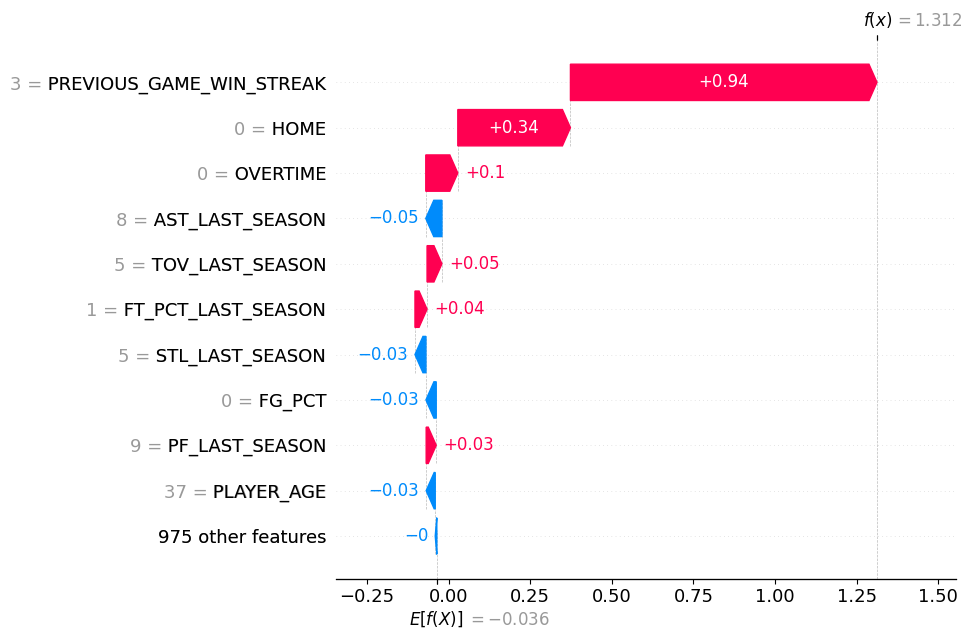

In [17]:
# (4) Train 3 seeds and pick up 1 representative seed result to explain feature to target relationships using shap.
explainer = shap.Explainer(best_model, X_train)
shap_values = explainer(X_test, check_additivity = False)
# which of the variables are important to the target = bare_nuclei
shap.plots.waterfall(shap_values[0], max_display = 11)

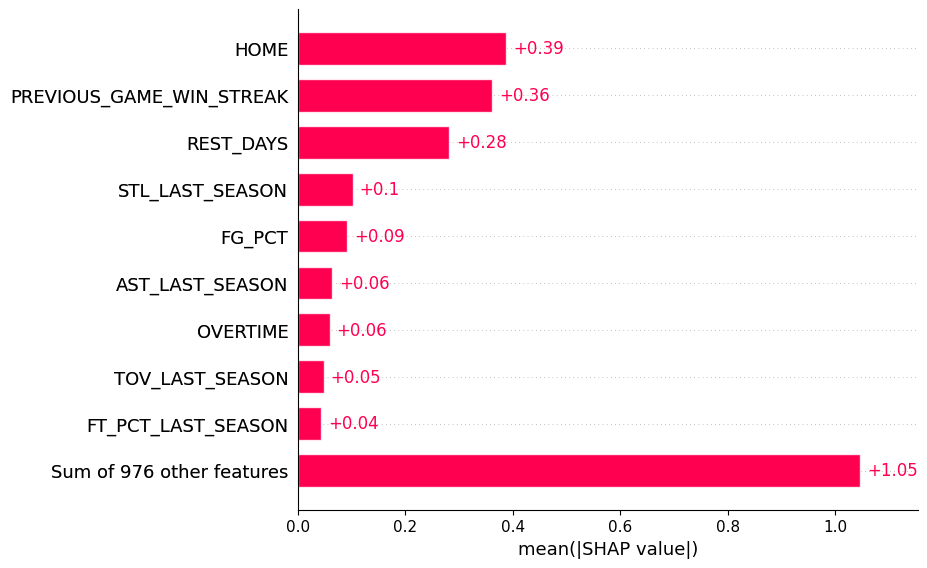

In [18]:
shap.plots.bar(shap_values)

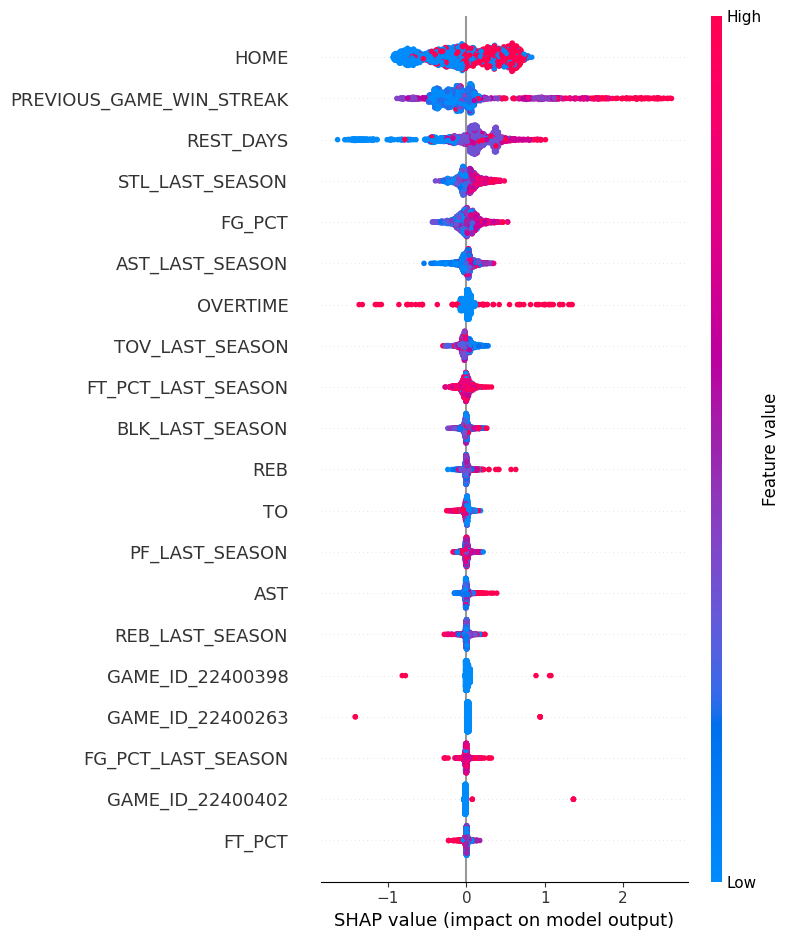

In [19]:
shap.summary_plot(shap_values)

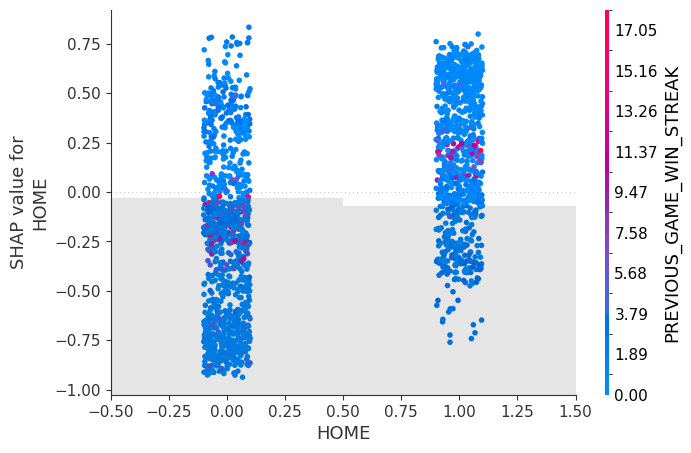

KeyboardInterrupt: 

In [20]:
for name in X_train.columns:
    shap.plots.scatter(shap_values[:, name], color=shap_values)

# all star breaks - 6 days - might be interesting what was the rest day for the opponent
# star players gets more ball and therefore, the turnover
# turnover percentage is correlated to how much you have the ball
# step curry most likely miss 3s because the team lets him to shoot 3s

Seed #2

In [21]:
seed2 = random_numbers[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed2)

In [22]:
# Define objective function
def objective(trial):
    # Suggest values for hyperparameters
    learning_rate = trial.suggest_float("learning_rate", 0.1, 0.9)
    n_estimators = trial.suggest_int("n_estimators", 10, 200, log=True)
    max_depth = trial.suggest_int("max_depth", 2, 100)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 2, 10)
    min_impurity_decrease= trial.suggest_float("min_impurity_decrease", 0.1, 0.9)


    # Create and fit random forest model
    model = GradientBoostingClassifier(
    learning_rate = learning_rate,
    n_estimators=n_estimators,
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf,
    min_impurity_decrease = min_impurity_decrease,
    random_state=seed2,
    )
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_pred = [1 if y > 0.5 else 0 for y in y_pred]
    accuracy = accuracy_score(y_test,y_pred)

    return accuracy

In [23]:
# Create study object
study = optuna.create_study(direction="maximize")
# Run optimization process
study.optimize(objective, n_trials=20, show_progress_bar=True)

[I 2025-02-13 01:17:54,716] A new study created in memory with name: no-name-de94dbb8-73bb-4a98-8a0d-8365f0be0443


  0%|          | 0/20 [00:00<?, ?it/s]

[I 2025-02-13 01:18:02,863] Trial 0 finished with value: 0.8706806282722513 and parameters: {'learning_rate': 0.3435542100070321, 'n_estimators': 15, 'max_depth': 67, 'min_samples_split': 3, 'min_samples_leaf': 6, 'min_impurity_decrease': 0.8004265153741106}. Best is trial 0 with value: 0.8706806282722513.
[I 2025-02-13 01:18:10,818] Trial 1 finished with value: 0.6979057591623037 and parameters: {'learning_rate': 0.5279513535148019, 'n_estimators': 19, 'max_depth': 41, 'min_samples_split': 3, 'min_samples_leaf': 6, 'min_impurity_decrease': 0.19230956367404312}. Best is trial 0 with value: 0.8706806282722513.
[I 2025-02-13 01:18:17,958] Trial 2 finished with value: 0.694240837696335 and parameters: {'learning_rate': 0.7616267334734664, 'n_estimators': 63, 'max_depth': 45, 'min_samples_split': 10, 'min_samples_leaf': 4, 'min_impurity_decrease': 0.36467879306678197}. Best is trial 0 with value: 0.8706806282722513.
[I 2025-02-13 01:18:32,135] Trial 3 finished with value: 0.839267015706806

In [24]:
# Print best trial and best hyperparameters
print("Best trial:", study.best_trial)
print("Best hyperparameters:", study.best_params)

Best trial: FrozenTrial(number=16, state=1, values=[0.9345549738219895], datetime_start=datetime.datetime(2025, 2, 13, 1, 21, 34, 903597), datetime_complete=datetime.datetime(2025, 2, 13, 1, 21, 44, 47210), params={'learning_rate': 0.4491567171149563, 'n_estimators': 41, 'max_depth': 100, 'min_samples_split': 8, 'min_samples_leaf': 4, 'min_impurity_decrease': 0.3940024227180127}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'learning_rate': FloatDistribution(high=0.9, log=False, low=0.1, step=None), 'n_estimators': IntDistribution(high=200, log=True, low=10, step=1), 'max_depth': IntDistribution(high=100, log=False, low=2, step=1), 'min_samples_split': IntDistribution(high=10, log=False, low=2, step=1), 'min_samples_leaf': IntDistribution(high=10, log=False, low=2, step=1), 'min_impurity_decrease': FloatDistribution(high=0.9, log=False, low=0.1, step=None)}, trial_id=16, value=None)
Best hyperparameters: {'learning_rate': 0.4491567171149563, 'n_estimators': 41

In [25]:
# prompt: use the best hyperparameters and run the model

# Get the best hyperparameters from the study
best_params = study.best_params

# Create and train the model with the best hyperparameters
best_model = GradientBoostingClassifier(**best_params, random_state=seed2)
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)
y_pred = [1 if y > 0.5 else 0 for y in y_pred]

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}") # see if this makes sense for the NBA game
print(f"F1 Score: {f1_score(y_test, y_pred, average='macro'):.3f}") # positive case - f1 score (yes) and negative case
print(f"F1 Score - Negative: {f1_score(y_test, y_pred, pos_label = 0):.3f}")
print(f"Specificity: {precision_score(y_test, y_pred):.3f}")
print(f"Sensitivity: {recall_score(y_test, y_pred):.3f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred):.3f}")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.935
F1 Score: 0.935
F1 Score - Negative: 0.936
Specificity: 0.954
Sensitivity: 0.913
ROC AUC: 0.935
[[913  42]
 [ 83 872]]


In [26]:
explainer = shap.Explainer(best_model, X_train)
shap_values2 = explainer(X_test, check_additivity = False)

In [27]:
seed3 = random_numbers[2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed3)

In [28]:
# Define objective function
def objective(trial):
    # Suggest values for hyperparameters
    learning_rate = trial.suggest_float("learning_rate", 0.1, 0.9)
    n_estimators = trial.suggest_int("n_estimators", 10, 200, log=True)
    max_depth = trial.suggest_int("max_depth", 2, 100)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 2, 10)
    min_impurity_decrease= trial.suggest_float("min_impurity_decrease", 0.1, 0.9)


    # Create and fit random forest model
    model = GradientBoostingClassifier(
    learning_rate = learning_rate,
    n_estimators=n_estimators,
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf,
    min_impurity_decrease = min_impurity_decrease,
    random_state=seed3,
    )
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_pred = [1 if y > 0.5 else 0 for y in y_pred]
    accuracy = accuracy_score(y_test,y_pred)

    return accuracy

In [29]:
# Create study object
study = optuna.create_study(direction="maximize")
# Run optimization process
study.optimize(objective, n_trials=20, show_progress_bar=True)

[I 2025-02-13 02:16:27,964] A new study created in memory with name: no-name-3763538a-4ce5-4ec0-bea2-1904c41f5e32


  0%|          | 0/20 [00:00<?, ?it/s]

[I 2025-02-13 02:16:35,371] Trial 0 finished with value: 0.7947643979057591 and parameters: {'learning_rate': 0.41374458137265946, 'n_estimators': 18, 'max_depth': 36, 'min_samples_split': 8, 'min_samples_leaf': 2, 'min_impurity_decrease': 0.534818293564474}. Best is trial 0 with value: 0.7947643979057591.
[I 2025-02-13 02:16:45,494] Trial 1 finished with value: 0.6769633507853403 and parameters: {'learning_rate': 0.45964642434768566, 'n_estimators': 137, 'max_depth': 28, 'min_samples_split': 3, 'min_samples_leaf': 8, 'min_impurity_decrease': 0.4724492022755976}. Best is trial 0 with value: 0.7947643979057591.
[I 2025-02-13 02:16:52,866] Trial 2 finished with value: 0.6732984293193718 and parameters: {'learning_rate': 0.7883394282142135, 'n_estimators': 102, 'max_depth': 36, 'min_samples_split': 5, 'min_samples_leaf': 7, 'min_impurity_decrease': 0.6720752659320385}. Best is trial 0 with value: 0.7947643979057591.
[I 2025-02-13 02:17:05,642] Trial 3 finished with value: 0.62617801047120

In [30]:
# Print best trial and best hyperparameters
print("Best trial:", study.best_trial)
print("Best hyperparameters:", study.best_params)

Best trial: FrozenTrial(number=19, state=1, values=[0.9314136125654451], datetime_start=datetime.datetime(2025, 2, 13, 2, 19, 53, 83032), datetime_complete=datetime.datetime(2025, 2, 13, 2, 20, 4, 390341), params={'learning_rate': 0.3434300318667194, 'n_estimators': 26, 'max_depth': 82, 'min_samples_split': 5, 'min_samples_leaf': 4, 'min_impurity_decrease': 0.21759046010066493}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'learning_rate': FloatDistribution(high=0.9, log=False, low=0.1, step=None), 'n_estimators': IntDistribution(high=200, log=True, low=10, step=1), 'max_depth': IntDistribution(high=100, log=False, low=2, step=1), 'min_samples_split': IntDistribution(high=10, log=False, low=2, step=1), 'min_samples_leaf': IntDistribution(high=10, log=False, low=2, step=1), 'min_impurity_decrease': FloatDistribution(high=0.9, log=False, low=0.1, step=None)}, trial_id=19, value=None)
Best hyperparameters: {'learning_rate': 0.3434300318667194, 'n_estimators': 26,

In [31]:
# prompt: use the best hyperparameters and run the model

# Get the best hyperparameters from the study
best_params = study.best_params

# Create and train the model with the best hyperparameters
best_model = GradientBoostingClassifier(**best_params, random_state=seed3)
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)
y_pred = [1 if y > 0.5 else 0 for y in y_pred]

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}") # see if this makes sense for the NBA game
print(f"F1 Score: {f1_score(y_test, y_pred, average='macro'):.3f}") # positive case - f1 score (yes) and negative case
print(f"F1 Score - Negative: {f1_score(y_test, y_pred, pos_label = 0):.3f}")
print(f"Specificity: {precision_score(y_test, y_pred):.3f}")
print(f"Sensitivity: {recall_score(y_test, y_pred):.3f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred):.3f}")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.931
F1 Score: 0.931
F1 Score - Negative: 0.933
Specificity: 0.925
Sensitivity: 0.936
ROC AUC: 0.932
[[906  71]
 [ 60 873]]


In [32]:
explainer = shap.Explainer(best_model, X_train)
shap_values3 = explainer(X_test, check_additivity = False)

In [33]:
seed4 = random_numbers[3]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed4)

In [34]:
# Define objective function
def objective(trial):
    # Suggest values for hyperparameters
    learning_rate = trial.suggest_float("learning_rate", 0.1, 0.9)
    n_estimators = trial.suggest_int("n_estimators", 10, 200, log=True)
    max_depth = trial.suggest_int("max_depth", 2, 100)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 2, 10)
    min_impurity_decrease= trial.suggest_float("min_impurity_decrease", 0.1, 0.9)


    # Create and fit random forest model
    model = GradientBoostingClassifier(
    learning_rate = learning_rate,
    n_estimators=n_estimators,
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf,
    min_impurity_decrease = min_impurity_decrease,
    random_state=seed4,
    )
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_pred = [1 if y > 0.5 else 0 for y in y_pred]
    accuracy = accuracy_score(y_test,y_pred)

    return accuracy

In [35]:
# Create study object
study = optuna.create_study(direction="maximize")
# Run optimization process
study.optimize(objective, n_trials=20, show_progress_bar=True)

[I 2025-02-13 02:21:15,876] A new study created in memory with name: no-name-261e538f-4685-4325-8283-0e5af5894a62


  0%|          | 0/20 [00:00<?, ?it/s]

[I 2025-02-13 02:21:24,137] Trial 0 finished with value: 0.6832460732984293 and parameters: {'learning_rate': 0.5979427920835577, 'n_estimators': 109, 'max_depth': 15, 'min_samples_split': 9, 'min_samples_leaf': 3, 'min_impurity_decrease': 0.6540468578634077}. Best is trial 0 with value: 0.6832460732984293.
[I 2025-02-13 02:21:34,314] Trial 1 finished with value: 0.7670157068062827 and parameters: {'learning_rate': 0.2855869338104536, 'n_estimators': 41, 'max_depth': 35, 'min_samples_split': 5, 'min_samples_leaf': 7, 'min_impurity_decrease': 0.6622012356678371}. Best is trial 1 with value: 0.7670157068062827.
[I 2025-02-13 02:21:40,206] Trial 2 finished with value: 0.8287958115183246 and parameters: {'learning_rate': 0.4698956775351686, 'n_estimators': 40, 'max_depth': 75, 'min_samples_split': 9, 'min_samples_leaf': 6, 'min_impurity_decrease': 0.8097039299727667}. Best is trial 2 with value: 0.8287958115183246.
[I 2025-02-13 02:21:53,146] Trial 3 finished with value: 0.7303664921465969

In [36]:
# Print best trial and best hyperparameters
print("Best trial:", study.best_trial)
print("Best hyperparameters:", study.best_params)

Best trial: FrozenTrial(number=15, state=1, values=[0.9717277486910995], datetime_start=datetime.datetime(2025, 2, 13, 2, 23, 16, 480639), datetime_complete=datetime.datetime(2025, 2, 13, 2, 23, 27, 259021), params={'learning_rate': 0.2990918604405991, 'n_estimators': 10, 'max_depth': 96, 'min_samples_split': 6, 'min_samples_leaf': 4, 'min_impurity_decrease': 0.5259309957700657}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'learning_rate': FloatDistribution(high=0.9, log=False, low=0.1, step=None), 'n_estimators': IntDistribution(high=200, log=True, low=10, step=1), 'max_depth': IntDistribution(high=100, log=False, low=2, step=1), 'min_samples_split': IntDistribution(high=10, log=False, low=2, step=1), 'min_samples_leaf': IntDistribution(high=10, log=False, low=2, step=1), 'min_impurity_decrease': FloatDistribution(high=0.9, log=False, low=0.1, step=None)}, trial_id=15, value=None)
Best hyperparameters: {'learning_rate': 0.2990918604405991, 'n_estimators': 10

In [37]:
# prompt: use the best hyperparameters and run the model

# Get the best hyperparameters from the study
best_params = study.best_params

# Create and train the model with the best hyperparameters
best_model = GradientBoostingClassifier(**best_params, random_state=seed4)
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)
y_pred = [1 if y > 0.5 else 0 for y in y_pred]

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}") # see if this makes sense for the NBA game
print(f"F1 Score: {f1_score(y_test, y_pred, average='macro'):.3f}") # positive case - f1 score (yes) and negative case
print(f"F1 Score - Negative: {f1_score(y_test, y_pred, pos_label = 0):.3f}")
print(f"Specificity: {precision_score(y_test, y_pred):.3f}")
print(f"Sensitivity: {recall_score(y_test, y_pred):.3f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred):.3f}")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.972
F1 Score: 0.972
F1 Score - Negative: 0.971
Specificity: 0.980
Sensitivity: 0.965
ROC AUC: 0.972
[[902  19]
 [ 35 954]]


In [38]:
explainer = shap.Explainer(best_model, X_train)
shap_values4 = explainer(X_test, check_additivity = False)

In [39]:
seed5 = random_numbers[4]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed5)

In [40]:
# Define objective function
def objective(trial):
    # Suggest values for hyperparameters
    learning_rate = trial.suggest_float("learning_rate", 0.1, 0.9)
    n_estimators = trial.suggest_int("n_estimators", 10, 200, log=True)
    max_depth = trial.suggest_int("max_depth", 2, 100)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 2, 10)
    min_impurity_decrease= trial.suggest_float("min_impurity_decrease", 0.1, 0.9)


    # Create and fit random forest model
    model = GradientBoostingClassifier(
    learning_rate = learning_rate,
    n_estimators=n_estimators,
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf,
    min_impurity_decrease = min_impurity_decrease,
    random_state=seed5,
    )
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_pred = [1 if y > 0.5 else 0 for y in y_pred]
    accuracy = accuracy_score(y_test,y_pred)

    return accuracy

In [41]:
# Create study object
study = optuna.create_study(direction="maximize")
# Run optimization process
study.optimize(objective, n_trials=20, show_progress_bar=True)

[I 2025-02-13 03:06:42,248] A new study created in memory with name: no-name-b3f0d7cd-b245-4354-a583-a9f483ccee96


  0%|          | 0/20 [00:00<?, ?it/s]

[I 2025-02-13 03:06:47,318] Trial 0 finished with value: 0.6361256544502618 and parameters: {'learning_rate': 0.8991461955902528, 'n_estimators': 25, 'max_depth': 15, 'min_samples_split': 9, 'min_samples_leaf': 8, 'min_impurity_decrease': 0.6169061489035113}. Best is trial 0 with value: 0.6361256544502618.
[I 2025-02-13 03:06:54,344] Trial 1 finished with value: 0.6481675392670158 and parameters: {'learning_rate': 0.665301711914269, 'n_estimators': 40, 'max_depth': 84, 'min_samples_split': 5, 'min_samples_leaf': 9, 'min_impurity_decrease': 0.499398651393128}. Best is trial 1 with value: 0.6481675392670158.
[I 2025-02-13 03:07:06,088] Trial 2 finished with value: 0.6963350785340314 and parameters: {'learning_rate': 0.6205385823543641, 'n_estimators': 53, 'max_depth': 24, 'min_samples_split': 5, 'min_samples_leaf': 5, 'min_impurity_decrease': 0.1431105216793272}. Best is trial 2 with value: 0.6963350785340314.
[I 2025-02-13 03:07:27,444] Trial 3 finished with value: 0.8031413612565445 an

In [42]:
# Print best trial and best hyperparameters
print("Best trial:", study.best_trial)
print("Best hyperparameters:", study.best_params)

Best trial: FrozenTrial(number=15, state=1, values=[0.9178010471204189], datetime_start=datetime.datetime(2025, 2, 13, 3, 9, 50, 667188), datetime_complete=datetime.datetime(2025, 2, 13, 3, 10, 3, 871825), params={'learning_rate': 0.25368429256721214, 'n_estimators': 15, 'max_depth': 99, 'min_samples_split': 7, 'min_samples_leaf': 5, 'min_impurity_decrease': 0.26916343528099124}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'learning_rate': FloatDistribution(high=0.9, log=False, low=0.1, step=None), 'n_estimators': IntDistribution(high=200, log=True, low=10, step=1), 'max_depth': IntDistribution(high=100, log=False, low=2, step=1), 'min_samples_split': IntDistribution(high=10, log=False, low=2, step=1), 'min_samples_leaf': IntDistribution(high=10, log=False, low=2, step=1), 'min_impurity_decrease': FloatDistribution(high=0.9, log=False, low=0.1, step=None)}, trial_id=15, value=None)
Best hyperparameters: {'learning_rate': 0.25368429256721214, 'n_estimators': 1

In [43]:
# prompt: use the best hyperparameters and run the model

# Get the best hyperparameters from the study
best_params = study.best_params

# Create and train the model with the best hyperparameters
best_model = GradientBoostingClassifier(**best_params, random_state=seed5)
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)
y_pred = [1 if y > 0.5 else 0 for y in y_pred]

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}") # see if this makes sense for the NBA game
print(f"F1 Score: {f1_score(y_test, y_pred, average='macro'):.3f}") # positive case - f1 score (yes) and negative case
print(f"F1 Score - Negative: {f1_score(y_test, y_pred, pos_label = 0):.3f}")
print(f"Specificity: {precision_score(y_test, y_pred):.3f}")
print(f"Sensitivity: {recall_score(y_test, y_pred):.3f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred):.3f}")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.918
F1 Score: 0.918
F1 Score - Negative: 0.913
Specificity: 0.915
Sensitivity: 0.929
ROC AUC: 0.917
[[823  86]
 [ 71 930]]


In [44]:
explainer = shap.Explainer(best_model, X_train)
shap_values5 = explainer(X_test, check_additivity = False)